In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df=pd.read_csv('Stocks.csv')

In [3]:
df

,date,open,high,low,close,volume
0,13/03/86,0.0548,0.0628,0.0548,0.0602,1031788800
1,14/03/86,0.0602,0.0634,0.0602,0.0623,308160000
2,17/03/86,0.0623,0.0639,0.0623,0.0634,133171200
3,18/03/86,0.0634,0.0639,0.0612,0.0618,67766400
4,19/03/86,0.0618,0.0623,0.0602,0.0607,47894400
...,...,...,...,...,...,...
9772,20/12/24,433.1100,443.7400,428.6300,436.6000,64263694
9773,23/12/24,436.7400,437.6500,432.8300,435.2500,1057002
9774,24/12/24,434.6500,439.6000,434.1900,439.3300,7137718
9775,26/12/24,439.0800,440.9400,436.6300,438.1100,2226177


## Data Preprocessing

In [4]:
df['date']

0       13/03/86
1       14/03/86
2       17/03/86
3       18/03/86
4       19/03/86
          ...   
9772    20/12/24
9773    23/12/24
9774    24/12/24
9775    26/12/24
9776    27/12/24
Name: date, Length: 9777, dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

In [6]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9772   2024-12-20
9773   2024-12-23
9774   2024-12-24
9775   2024-12-26
9776   2024-12-27
Name: Date, Length: 9777, dtype: datetime64[ns]

In [7]:
df= df[['Date', 'close']]
df

,Date,close
0,1986-03-13,0.0602
1,1986-03-14,0.0623
2,1986-03-17,0.0634
3,1986-03-18,0.0618
4,1986-03-19,0.0607
...,...,...
9772,2024-12-20,436.6000
9773,2024-12-23,435.2500
9774,2024-12-24,439.3300
9775,2024-12-26,438.1100


In [8]:
df.index= df.pop('Date')
df

,close
Date,
1986-03-13,0.0602
1986-03-14,0.0623
1986-03-17,0.0634
1986-03-18,0.0618
1986-03-19,0.0607
...,...
2024-12-20,436.6000
2024-12-23,435.2500
2024-12-24,439.3300


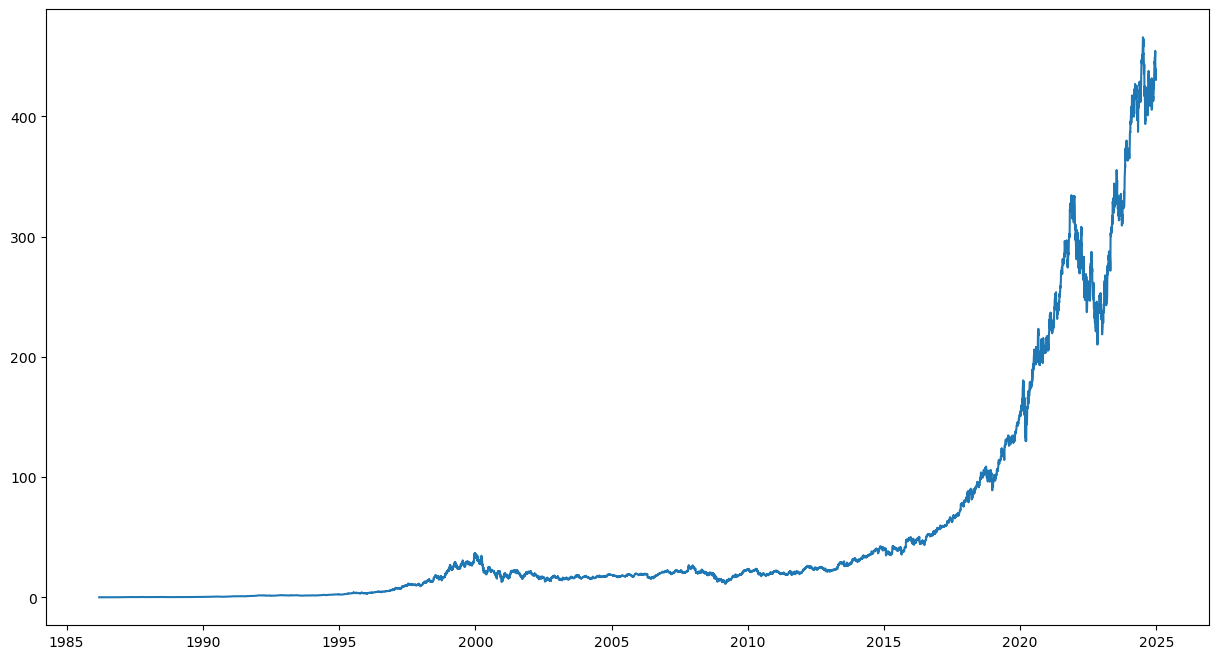

In [9]:
plt.figure(figsize=(15,8))
plt.plot(df)
plt.show()

## Scaling the Data

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df1 = pd.DataFrame(df1, columns=df.columns, index=df.index)

In [12]:
df1

,close
Date,
1986-03-13,0.000009
1986-03-14,0.000014
1986-03-17,0.000016
1986-03-18,0.000013
1986-03-19,0.000010
...,...
2024-12-20,0.937320
2024-12-23,0.934422
2024-12-24,0.943182


## Creating a Windowed DataFrame

In [13]:
def str_to_datetime(date):
    return pd.to_datetime(date, format='%Y-%m-%d')

In [14]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, '2021-03-25',  '2022-03-23', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,228.6235,230.1639,228.1101,225.0874
1,2021-03-26,230.1639,228.1101,225.0874,229.0982
2,2021-03-29,228.1101,225.0874,229.0982,227.8969
3,2021-03-30,225.0874,229.0982,227.8969,224.6127
4,2021-03-31,229.0982,227.8969,224.6127,228.4104
...,...,...,...,...,...
247,2022-03-17,269.9942,280.4545,287.5257,288.3363
248,2022-03-18,280.4545,287.5257,288.3363,293.4249
249,2022-03-21,287.5257,288.3363,293.4249,292.1845
250,2022-03-22,288.3363,293.4249,292.1845,296.9702


In [15]:
windowed_df = df_to_windowed_df(df1, '1986-04-01', '2024-12-27', 10)  #time step = 10
windowed_df

,Target Date,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1986-04-01,0.000016,0.000013,0.000010,0.000007,0.000003,0.000000,0.000002,0.000006,0.000008,0.000007,0.000006
1,1986-04-02,0.000013,0.000010,0.000007,0.000003,0.000000,0.000002,0.000006,0.000008,0.000007,0.000006,0.000007
2,1986-04-03,0.000010,0.000007,0.000003,0.000000,0.000002,0.000006,0.000008,0.000007,0.000006,0.000007,0.000008
3,1986-04-04,0.000007,0.000003,0.000000,0.000002,0.000006,0.000008,0.000007,0.000006,0.000007,0.000008,0.000008
4,1986-04-07,0.000003,0.000000,0.000002,0.000006,0.000008,0.000007,0.000006,0.000007,0.000008,0.000008,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...
9760,2024-12-20,0.952286,0.957546,0.951771,0.963923,0.965147,0.960230,0.969506,0.975668,0.939017,0.938244,0.937320
9761,2024-12-23,0.957546,0.951771,0.963923,0.965147,0.960230,0.969506,0.975668,0.939017,0.938244,0.937320,0.934422
9762,2024-12-24,0.951771,0.963923,0.965147,0.960230,0.969506,0.975668,0.939017,0.938244,0.937320,0.934422,0.943182
9763,2024-12-26,0.963923,0.965147,0.960230,0.969506,0.975668,0.939017,0.938244,0.937320,0.934422,0.943182,0.940563


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[ 1], 1))
    Y= df_as_np[:,-1]
    
    return dates, X.astype(np.float32) , Y.astype(np.float32)

In [17]:
dates, X, Y = windowed_df_to_date_X_y(windowed_df)
print(dates.shape, X.shape, Y.shape)

(9765,) (9765, 10, 1) (9765,)


## Train Test Split

In [18]:
train_size= int(len(dates)*0.7)
val_size= int(len(dates)*0.1)
test_size= int(len(dates)*0.2)

In [19]:
dates_train, X_train, Y_train = dates[:train_size], X[:train_size], Y[:train_size]
dates_val, X_val, Y_val = dates[train_size:train_size + val_size], X[train_size:train_size + val_size], Y[train_size:train_size + val_size]
dates_test, X_test, Y_test = dates[train_size + val_size:], X[train_size + val_size:], Y[train_size + val_size:]

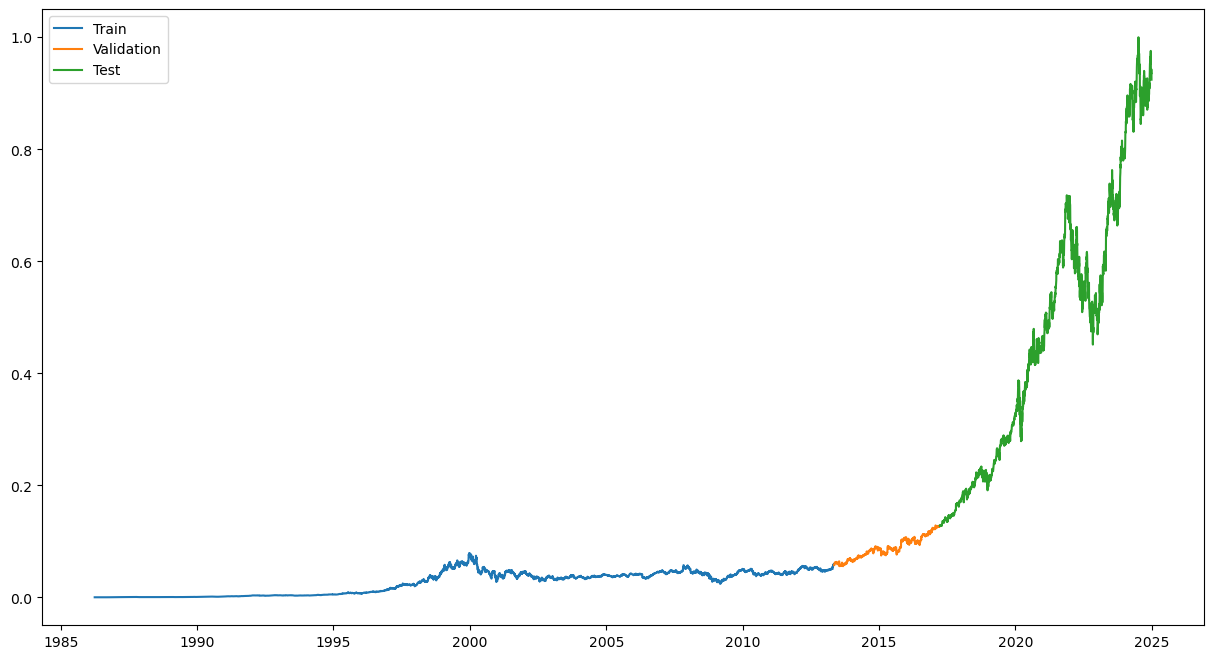

In [20]:
plt.figure(figsize=(15,8))
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

## Model Training

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model= Sequential()

In [23]:
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

/Users/harleen/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='mse')

In [25]:
early_stopping = EarlyStopping( monitor='val_loss',    
    patience=15,             
    restore_best_weights=True  
)

In [26]:
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=64, callbacks=[early_stopping] )

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4107e-04 - val_loss: 3.6345e-04
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1803e-05 - val_loss: 2.6938e-04
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7060e-06 - val_loss: 2.1863e-04
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3571e-06 - val_loss: 1.7793e-04
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.4997e-06 - val_loss: 1.9411e-04
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7780e-06 - val_loss: 1.8245e-04
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.0110e-06 - val_loss: 2.3111e-04
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.5191e-06 - val_loss: 1.9672e-04
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1078e-06 - val_loss: 1.6501e-04
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1242e-06 - val_loss: 1.7529e-04
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,269 (622.15 KB)

 Trainable params: 53,089 (207.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,180 (414.77 KB)

## Evaluation of the Model

In [28]:
train_predict=model.predict(X_train)
val_predict=model.predict(X_val)
test_predict=model.predict(X_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [29]:
print(train_predict.max(), val_predict.max(), test_predict.max())

0.0715446 0.11023756 0.9352216


 Inverse Scaling the Predictions and Y

In [30]:
train_predict=scaler.inverse_transform(train_predict)
val_predict=scaler.inverse_transform(val_predict)
test_predict=scaler.inverse_transform(test_predict)

Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_val= scaler.inverse_transform(Y_val.reshape(-1, 1))
Y_test= scaler.inverse_transform(Y_test.reshape(-1, 1))

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

0.8719192151852692

In [32]:
math.sqrt(mean_squared_error(Y_val,val_predict))

4.660101405010461

In [33]:
math.sqrt(mean_squared_error(Y_test,test_predict))

28.759420161868267

## Plotting the Graphs

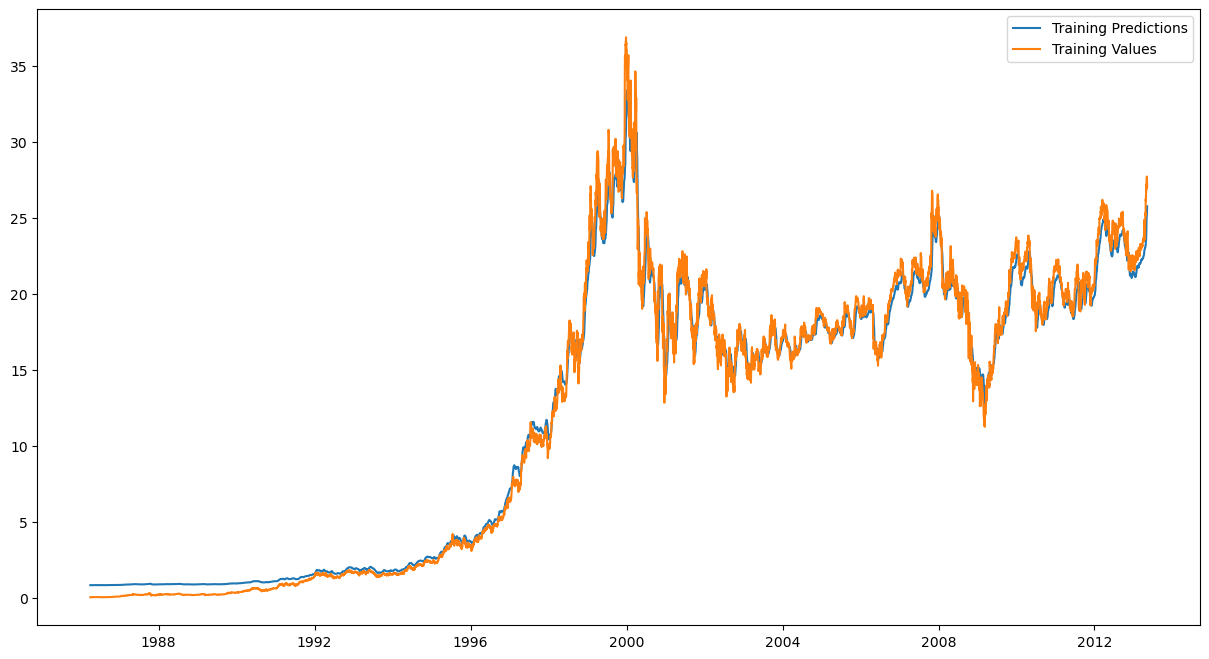

In [34]:
training_pred = train_predict.flatten()

plt.figure(figsize=(15,8))
plt.plot(dates_train, training_pred)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Values'])
plt.show()

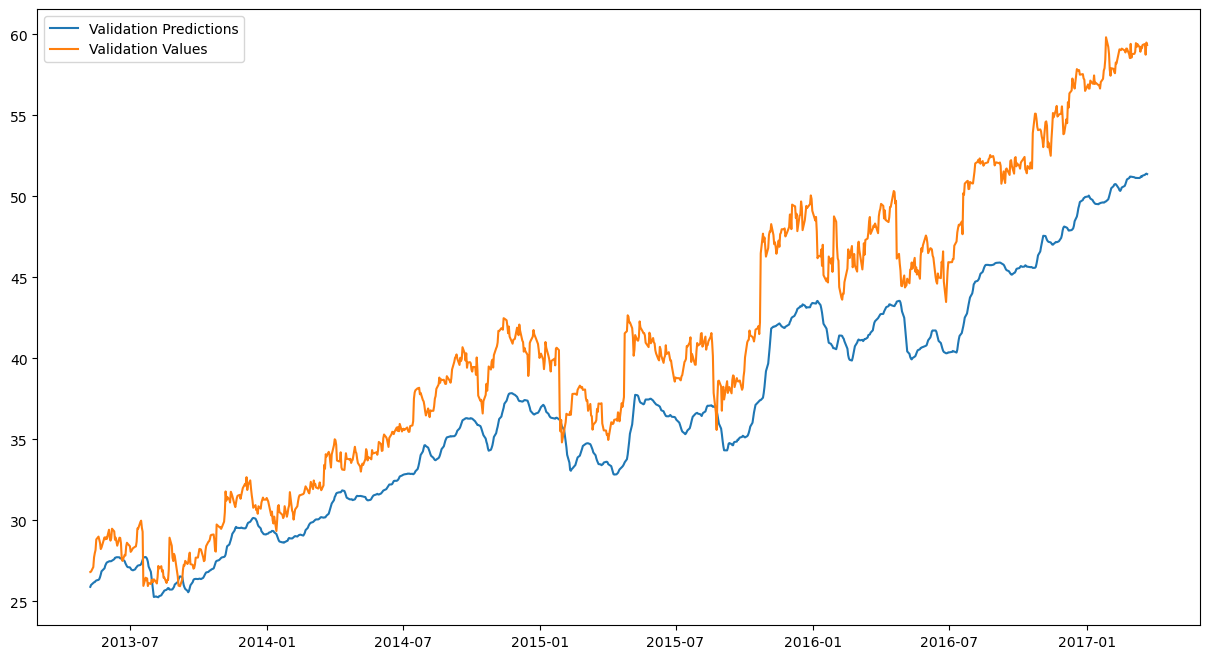

In [35]:
val_pred = val_predict.flatten()

plt.figure(figsize=(15,8))
plt.plot(dates_val, val_pred)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Values'])
plt.show()

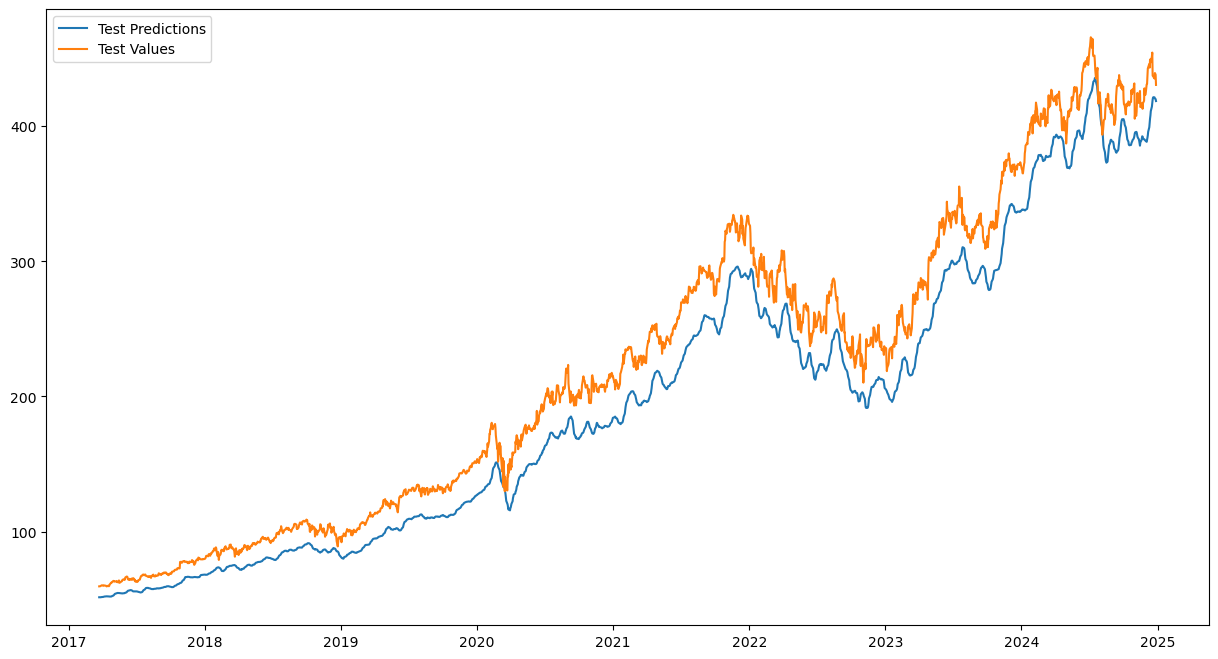

In [36]:
test_pred = test_predict.flatten()

plt.figure(figsize=(15,8))
plt.plot(dates_test, test_pred)
plt.plot(dates_test, Y_test)
plt.legend(['Test Predictions', 'Test Values'])
plt.show()

## Predicting for the next 10 Days

change the value of i to predict for a different number of days

In [37]:
X_test.shape

(1954, 10, 1)

In [38]:
X_test.max()

1.0

In [39]:
x_input=X_test[1944:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
from numpy import array

lst_output = []
n_steps = 10
i = 0

while i < 10:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]) 
      #  print("{} day input {}".format(i, x_input))
        
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
       # print("{} day output {}".format(i, yhat))
        
        # Update temp_input with the new prediction
        temp_input.append(yhat[0][0]) 
        temp_input = temp_input[-(n_steps + 1):] 
        lst_output.append(yhat[0][0])
        i += 1
    else:
        # when temp_input is smaller than required steps
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

print("Predicted values:", lst_output)

Predicted values: [0.8986399, 0.89351535, 0.8877329, 0.8792211, 0.86845493, 0.8617149, 0.85375357, 0.84461236, 0.8345806, 0.82194024]


Inverse Scaling the Predicted Values and plotting them 

In [42]:
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [43]:
lst_output

array([[418.58514],
       [416.19846],
       [413.50534],
       [409.54108],
       [404.5269 ],
       [401.38782],
       [397.67993],
       [393.42255],
       [388.7504 ],
       [382.8633 ]], dtype=float32)